# Importing **Libraries**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

# Creating **Dataset**

In [2]:
train_dataset = pd.read_csv("DailyDelhiClimateTrain.csv")

In [3]:
train_dataset.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
train_dataset.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


# Visualising the data by the help of **Plotly**

In [17]:
fig = px.line(train_dataset,
              x="date",
              y='meantemp',
              title='Mean Temperature in Delhi over the years')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [7]:
fig = px.line(train_dataset,
              x="date",
              y='humidity',
              title='Humidity in Delhi over the years')
fig.show()

In [8]:
fig = px.line(train_dataset,
              x="date",
              y='wind_speed',
              title='Windspeed in Delhi over the years')
fig.show()

In [18]:
fig = px.scatter(data_frame = train_dataset,
                  x="humidity",
                  y='meantemp',
                 size='meantemp',
                  trendline = "ols",
                  title='Relationship Between Temperature and Humidity in Delhi')
fig.show()

# Adding a year column and a month **column**

In [10]:
train_dataset["date"] = pd.to_datetime(train_dataset["date"], format = '%Y-%m-%d')
train_dataset['year'] = train_dataset['date'].dt.year
train_dataset["month"] = train_dataset["date"].dt.month
train_dataset.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


# Checking which year has faced more **heat**

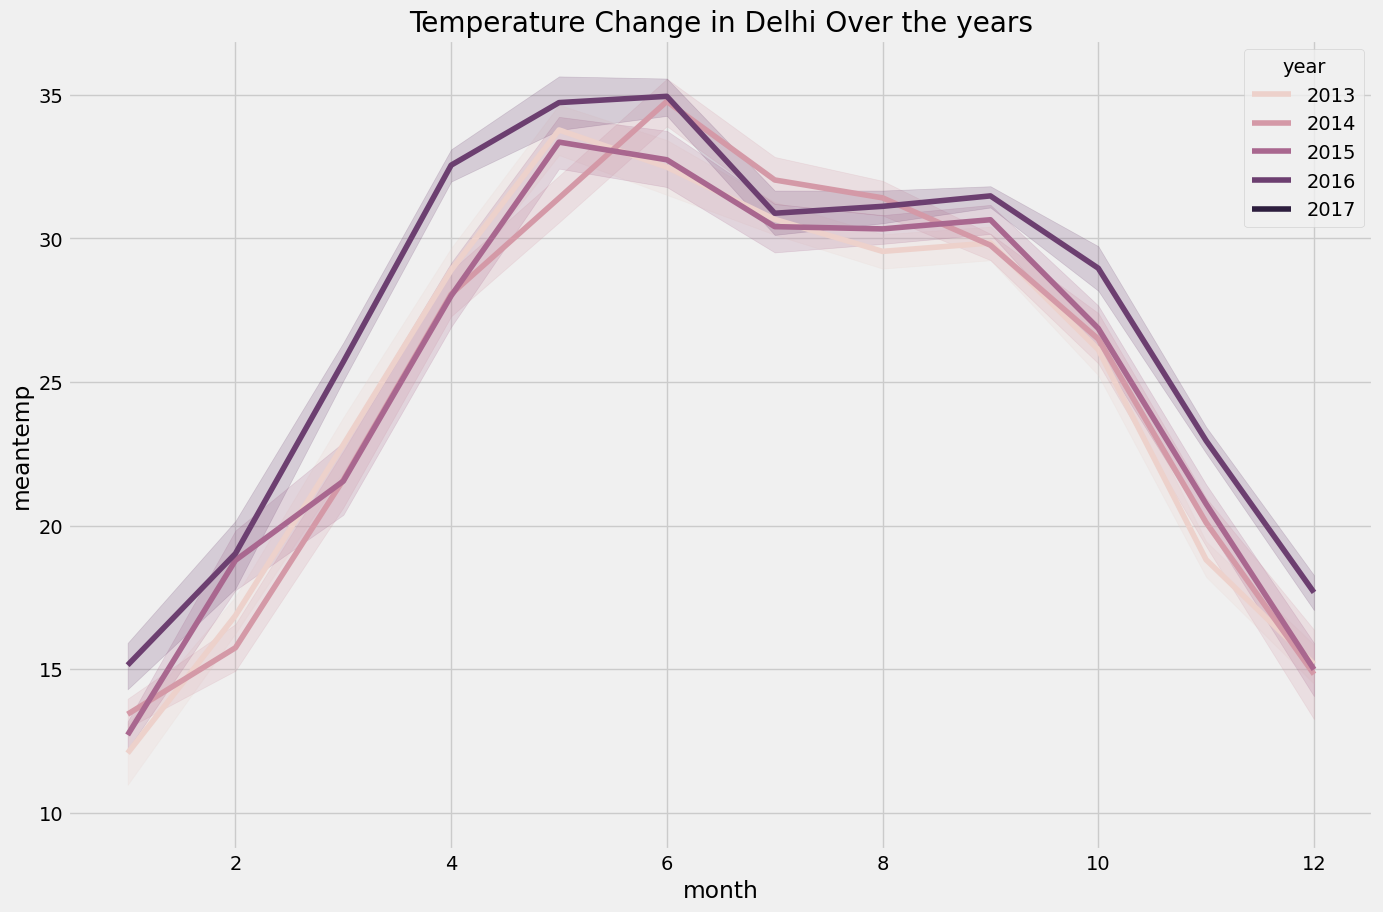

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the years")
sns.lineplot(data=train_dataset, x='month',y='meantemp', hue='year')
plt.show()

# We are using Prophet model because this project is of time-series and this model is beneficial for time series **bold text**

In [13]:
!pip install prophet

# renaming the data that model can accept **it**

In [14]:
forecast_data = train_dataset.rename(columns={"date": 'ds',
                                              "meantemp": 'y'})
forecast_data

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


# **Implementing** the Prophet model

In [16]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1x4soxk/zsizgi48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1x4soxk/nrzg61ox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88523', 'data', 'file=/tmp/tmpr1x4soxk/zsizgi48.json', 'init=/tmp/tmpr1x4soxk/nrzg61ox.json', 'output', 'file=/tmp/tmpr1x4soxk/prophet_modeln0biiyuy/prophet_model-20240731143750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime 